## Basic pywikibot operations

In [1]:
import pywikibot as pb
from pywikibot import pagegenerators
from datetime import datetime

### Site

In [2]:
commons_site = pb.Site("commons", "commons")

### Page

In [3]:
page = pb.Page(commons_site, 'File:Motín de Aranjuez 2016 06.jpg')
page.exists()

True

In [4]:
# See https://www.mediawiki.org/wiki/Manual:Namespace#Built-in_namespaces
page = pb.Page(commons_site, 'Motín de Aranjuez 2016 06.jpg', ns=6)
page.exists()

True

In [5]:
page = pb.Page(commons_site, 'File:Parlament Europeu.jpg')
page.exists()

True

In [6]:
if page.isRedirectPage():
    page = pb.Page(commons_site, 'File:Parlament Europeu.jpg').getRedirectTarget()
    print(page.title())

File:Carles Puigdemont al Parlament Europeu.jpg


In [7]:
page = pb.Page(commons_site, 'Motín de Aranjuez 2016 06.jpg', ns=6)
page.is_categorypage()

False

In [8]:
page.is_filepage()

True

In [9]:
page.text

'=={{int:filedesc}}==\n{{Information\n|description={{WLF|Q23199370}}\n|date=2016-09-03 23:16:03\n|source={{own}}\n|author=[[User:Rodelar|Rodelar]]\n|permission=\n|other versions=\n}}\n\n=={{int:license-header}}==\n{{User:Rodelar/credit}}\n{{cc-by-sa-4.0|Rubén Ojeda}}\n\n[[Category:Files by User:Rodelar]]\n\n{{Wiki Loves Folk 2016}}\n\n[[Category:Motín de Aranjuez]]\n[[Category:Uploaded via Campaign:wlfolk]]\n[[Category:Images from Wiki Loves Folk 2016 in Spain (qualified)]]\n[[Category:All media supported by Wikimedia España in 2016]]\n[[Category:Images from Wiki Loves Folk 2016 in Spain by Rodelar]]\n[[Category:Images of festival with code Q23199370 from Wiki Loves Folk 2016 in Spain]]\n[[Category:Images of festival with code Q23199370]]'

In [10]:
revisions = [revision for revision in page.revisions()]
revisions[0]

{'revid': 283499626, 'text': None, 'timestamp': Timestamp(2018, 1, 28, 14, 8, 23), 'user': 'Discasto', 'anon': False, 'comment': 'WLF 2016 in Spain: Classification', 'minor': True, 'rollbacktoken': None, '_parent_id': 279471402, '_content_model': 'wikitext', '_sha1': '5d82c9bbccea66e8aa47f5ddd6e2003de8fe6984'}

In [11]:
revisions = [revision for revision in page.revisions(reverse=True, content=True)]
revisions[0]

{'revid': 225314754, 'text': '=={{int:filedesc}}==\n{{Information\n|description={{WLF|Q23199370}}\n|date=2016-09-03 23:16:03\n|source={{own}}\n|author=[[User:Rodelar|Rodelar]]\n|permission=\n|other versions=\n}}\n\n=={{int:license-header}}==\n{{self|cc-by-sa-4.0}}\n\n{{Wiki Loves Folk}}\n\n[[Category:Motín de Aranjuez]]\n[[Category:Uploaded via Campaign:wlfolk]]', 'timestamp': Timestamp(2016, 12, 6, 12, 34, 57), 'user': 'Rodelar', 'anon': False, 'comment': 'User created page with UploadWizard', 'minor': False, 'rollbacktoken': None, '_parent_id': 0, '_content_model': 'wikitext', '_sha1': '8f5569f109fdd4836dd3092576b440b668db088a'}

In [12]:
page.contributors()

Counter({'Discasto': 2, 'Poco a poco': 2, 'Rodelar': 4})

In [13]:
page.oldest_revision['user']

'Rodelar'

In [14]:
page.oldest_revision['timestamp'].strftime("%Y-%m-%d")

'2016-12-06'

### FilePage

In [15]:
file = pb.FilePage(commons_site, 'File:Motín de Aranjuez 2016 06.jpg')
file.latest_file_info

{'timestamp': Timestamp(2016, 12, 6, 12, 34, 57), 'user': 'Rodelar', 'size': 1295571, 'width': 3274, 'height': 2440, 'comment': 'User created page with UploadWizard', 'url': 'https://upload.wikimedia.org/wikipedia/commons/c/c7/Mot%C3%ADn_de_Aranjuez_2016_06.jpg', 'descriptionurl': 'https://commons.wikimedia.org/wiki/File:Mot%C3%ADn_de_Aranjuez_2016_06.jpg', 'descriptionshorturl': 'https://commons.wikimedia.org/w/index.php?curid=53825039', 'sha1': '23b18d7c690e626b991b4f0eea973a1ff1b2df0d', 'metadata': [{'name': 'DateTime', 'value': '2016:09:03 23:16:03'}, {'name': 'Model', 'value': 'Nexus 5'}, {'name': 'ImageWidth', 'value': 3274}, {'name': 'ResolutionUnit', 'value': 2}, {'name': 'YCbCrPositioning', 'value': 1}, {'name': 'ImageLength', 'value': 2440}, {'name': 'YResolution', 'value': '72/1'}, {'name': 'Orientation', 'value': 1}, {'name': 'Software', 'value': 'HDR+ 1.0.118402515y'}, {'name': 'XResolution', 'value': '72/1'}, {'name': 'Make', 'value': 'LGE'}, {'name': 'ColorSpace', 'value

### Category

In [16]:
from pywikibot import pagegenerators

In [17]:
for category in page.categories() :
    print (category.title())

Category:All media supported by Wikimedia España in 2016
Category:CC-BY-SA-4.0
Category:Files by User:Rodelar
Category:Folklore events in Spain with known IDs
Category:Images from Wiki Loves Folk 2016 in Spain
Category:Images from Wiki Loves Folk 2016 in Spain (qualified)
Category:Images from Wiki Loves Folk 2016 in Spain by Rodelar
Category:Images of festival with code Q23199370
Category:Images of festival with code Q23199370 from Wiki Loves Folk 2016 in Spain
Category:Motín de Aranjuez
Category:Uploaded via Campaign:wlfolk


In [18]:
for category in page.categories() :
    if not category.isHiddenCategory() :
        print (category.title())

Category:Motín de Aranjuez


In [19]:
category = pb.Category(commons_site, 'Category:Files by User:Rodelar')
category.categoryinfo

{'files': 3386, 'hidden': '', 'pages': 0, 'size': 3386, 'subcats': 0}

In [20]:
rodelar_pages = pagegenerators.CategorizedPageGenerator(category)

### User

In [21]:
rodelar = pb.User(commons_site, "Rodelar")

In [22]:
rodelar.editCount()

56542

In [23]:
rodelar.gender()

'male'

In [24]:
rodelar.groups()

['autopatrolled', 'filemover', '*', 'user', 'autoconfirmed']

In [25]:
rodelar.registration().strftime("%Y-%m-%d")

'2008-12-03'

In [26]:
discasto = pb.User(pb.Site('es', 'wikipedia'), 'Discasto')
discasto.isBlocked()

True

In [27]:
ecemaml = pb.User(commons_site, 'Ecemaml')
ecemaml.registration()

## Pandas

In [28]:
import pandas as pd
import numpy as np

In [29]:
gen_aranjuez = pagegenerators. \
                     CategorizedPageGenerator(pb.Category(commons_site, "Aranjuez"), recurse=True)
images_aranjuez = list(
    set([page.title(withNamespace=True) for page in gen_aranjuez if page.is_filepage()])
)

In [30]:
images_df = pd.DataFrame(columns=['image_title', 'uploader', 'uploader_registration', 
                                  'timestamp', 'url', 'size', 'height', 'width'])
for image in images_aranjuez :
    image_row = {'image_title': None, 
                 'uploader': None,
                 'uploader_registration': None,
                 'timestamp': None,
                 'url': None,
                 'size': 0,
                 'height': 0,
                 'width': 0}
    page = pb.FilePage(commons_site, image)
    image_row["image_title"] = image

    fileinfo = page.latest_file_info
    image_row["size"] = fileinfo['size']
    image_row["height"] = fileinfo['height']
    image_row["width"] = fileinfo['width']
    image_row["url"] = fileinfo['url']

    creation = page.oldest_revision
    image_row["uploader"] = creation["user"]
    image_row["timestamp"] = creation["timestamp"]
    try:
        # Too old users do not have a user registration time
        image_row["uploader_registration"] = pb.User(commons_site, title=creation["user"]) \
                                               .registration()
    except :
        image_row["uploader_registration"] = datetime(2006, 1, 1)
    
    images_df = images_df.append(image_row, ignore_index=True)

In [31]:
images_df.to_csv("images_aranjuez.csv", header=True, sep="|", index=False)

In [32]:
csv_df = pd.read_csv("images_aranjuez.csv", sep="|", parse_dates=True)

In [33]:
len(images_df)

1875

In [34]:
images_df.describe(include="all")

,image_title,uploader,uploader_registration,timestamp,url,size,height,width
count,1875,1875,1506,1875,1875,1875.0,1875.0,1875.0
unique,1875,134,114,1528,1875,1833.0,482.0,426.0
top,File:Jardín del Príncipe - panoramio (27).jpg,Assdl,2014-09-28 13:24:04,2016-04-04 10:39:20,https://upload.wikimedia.org/wikipedia/commons...,3502096.0,1704.0,2272.0
freq,1,248,244,3,1,29.0,229.0,230.0
first,NaN,NaN,NaN,2005-03-11 23:52:29,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-02-16 09:31:26,NaN,NaN,NaN,NaN


In [35]:
csv_df['uploader'].value_counts()[:12]

Assdl                      248
Panoramio upload bot       244
Zarateman                  203
Piragüismo Aranjuez        179
MiguelHermoso              164
PMRMaeyaert                144
Benjamín Núñez González    129
Rodelar                     79
Discasto                    56
Superzerocool               34
Strakhov                    34
AdriPozuelo                 22
Name: uploader, dtype: int64

In [36]:
csv_df[csv_df['uploader_registration'].isin([np.nan])]['uploader'].unique()

array(['Barcex', 'Assdl', 'Emijrp', 'Kordas', 'Zaqarbal', 'Superzerocool',
       'Sabbut', 'Sir Gawain', 'Tony Rotondas', 'Deadstar', 'ManuelGR',
       'Alvy', 'Benedicto16', 'Hatto', 'Luis Fernández García',
       'File Upload Bot (Eloquence)', 'Ecemaml', 'Alberto Salguero',
       'Yearofthedragon', 'Xauxa'], dtype=object)

In [37]:
csv_df['timestamp'].min()

'2005-03-11 23:52:29'

In [38]:
csv_df[csv_df['timestamp'] == csv_df['timestamp'].min()]['url'].values[0]

'https://upload.wikimedia.org/wikipedia/commons/c/c3/Aranjuez_PalacioReal_night1.jpg'

In [39]:
from IPython.display import Image
Image(url=csv_df[csv_df['timestamp'] == csv_df['timestamp'].min()]['url'].values[0], width=600)

## Mako

In [40]:
from mako.template import Template

In [41]:
autcom_cat_template = """{{hiddencat}}

[[Category:Images from ${tag} ${year} in Spain by site| ${autcom_name}]]"""

vars = {
    "autcom_name": "Canary Islands",
    "tag": "Wiki Loves Earth",
    "year": 2017}

t = Template(autcom_cat_template)
cat_text = t.render(**vars)
print(cat_text)

{{hiddencat}}

[[Category:Images from Wiki Loves Earth 2017 in Spain by site| Canary Islands]]


## Matplotlib

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

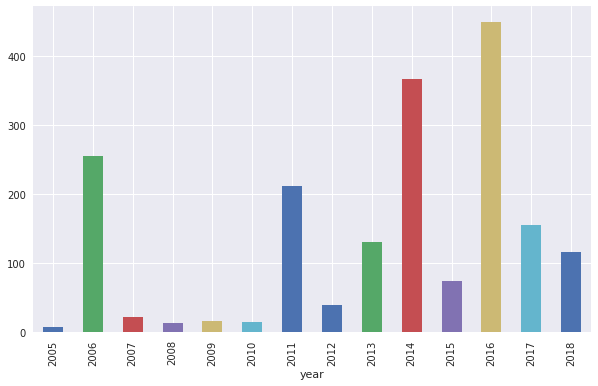

In [43]:
figsize=[10., 6.]
fig, ax = plt.subplots(figsize=figsize)

frame = images_df.copy(deep=True)

(frame.set_index('timestamp'). # use date-time as index
 assign(year=lambda x: x.index.year). # add new column with year
 groupby('year'). # group by that column
 count()['image_title']. # find a sum of the only column 'y'
 plot.bar(ax=ax));

### geojson

In [44]:
file = pb.FilePage(commons_site, 'File:Valley View Yosemite August 2013 002.jpg')
coordinates = file.coordinates(primary_only=True)
coordinates

Coordinate(lat=37.717222, lon=-119.661944, entity=http://www.wikidata.org/entity/Q2)

In [45]:
from geojson import Feature, Point, FeatureCollection
import geojson

properties = {"title": "Valley View in Yosemite National Park",
              "marker-size": "small",
              "marker-symbol": "circle",
              "marker-color": "gree"}

feature = Feature(geometry=Point((coordinates.lat, coordinates.lon)),
                 properties=properties)
feature_collection = FeatureCollection([feature])
dump = geojson.dumps(feature_collection, ensure_ascii=False, indent=2)
print(dump)

{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "geometry": {
        "type": "Point",
        "coordinates": [
          37.717222,
          -119.661944
        ]
      },
      "properties": {
        "title": "Valley View in Yosemite National Park",
        "marker-size": "small",
        "marker-symbol": "circle",
        "marker-color": "gree"
      }
    }
  ]
}


## Pillow

In [46]:
import requests
from PIL import Image
from io import BytesIO
from pywikibot.specialbots import UploadRobot
import os

In [47]:
template = u"""=={{int:filedesc}}==
{{Information
|description={{es|1=${description}}}
|date=${date}
|source=[${url} Diario de Madrid - ${title}]
|author=[https://diario.madrid.es/ Diario de Madrid]
|permission=
|other versions=
}}

=={{int:license-header}}==
{{Diario de Madrid}}

[[Category:Files uploaded by User:Discasto]]
[[Category:February 2017 in Madrid]]"""

In [48]:
image_url = "https://diario.madrid.es/wp-content/uploads/2018/02/Gal_CarmenaConJavierFernandez_3-1282x1000.jpg"
image_title = "La alcaldesa agradece a Javier Fernández el bronce olímpico"
image_path = image_title + ".jpg"
description = "Manuela Carmena ha recibido a Javier Fernández, quien ha ofrecido a los madrileños la medalla recientemente ganada en los Juegos de Pyeongchang"
date = '2018-02-20'
try: 
    r = requests.get(image_url)
    downloaded_image = Image.open(BytesIO(r.content))
    downloaded_image.save(image_path)
except Exception as err:
    print ('Failed download ({}). Skipping'.format(err))

vars = {
    "description": description,
    "date": date,
    "url": image_url,
    "title": image_title
}
    
t = Template(template)
_text = t.render(**vars)

bot = UploadRobot([image_path],
                    description = _text,
                    useFilename = image_path,
                    keepFilename = True,
                    verifyDescription = False,
                    ignoreWarning = True,
                    targetSite = commons_site)
bot.run()

os.remove(image_path)